# ANN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix
import sklearn.metrics as metrics

# Input Data

In [2]:
df = pd.read_csv('../Data.csv')

In [3]:
dft = pd.read_csv('testing4.csv')

In [4]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)
X_train = df.drop('label',axis=1).values
y_train = df['label'].values

X_test = dft.drop('label',axis=1).values
y_test = dft['label'].values

# One-hot encode the target

In [5]:
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit(y_train.reshape(-1, 1))
y_train = enc.transform(y_train.reshape(-1, 1))
y_test = enc.transform(y_test.reshape(-1, 1))

In [6]:
print(y_train.shape, y_test.shape)

(18000, 6) (1500, 6)


# scale the features

In [7]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
model = Sequential()

model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=521,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
%%time
model.fit(x=X_train, y=y_train, epochs=100, batch_size=512, validation_data=(X_test, y_test))

Train on 18000 samples, validate on 1500 samples
Epoch 1/100
18000/18000 [==============================] - 13s 731us/sample - loss: 1.7051 - accuracy: 0.2571 - val_loss: 1.4286 - val_accuracy: 0.4053
Epoch 2/100
18000/18000 [==============================] - 1s 30us/sample - loss: 1.4842 - accuracy: 0.4059 - val_loss: 1.2364 - val_accuracy: 0.5613
Epoch 3/100
18000/18000 [==============================] - 0s 22us/sample - loss: 1.3522 - accuracy: 0.4788 - val_loss: 1.0820 - val_accuracy: 0.6033
Epoch 4/100
18000/18000 [==============================] - 0s 23us/sample - loss: 1.2571 - accuracy: 0.5241 - val_loss: 1.0051 - val_accuracy: 0.6287
Epoch 5/100
18000/18000 [==============================] - 0s 22us/sample - loss: 1.2006 - accuracy: 0.5457 - val_loss: 0.9678 - val_accuracy: 0.6273
Epoch 6/100
18000/18000 [==============================] - 0s 23us/sample - loss: 1.1593 - accuracy: 0.5602 - val_loss: 0.9290 - val_accuracy: 0.6620
Epoch 7/100
18000/18000 [========================

Epoch 55/100
18000/18000 [==============================] - 0s 25us/sample - loss: 0.4462 - accuracy: 0.8321 - val_loss: 0.2251 - val_accuracy: 0.9220
Epoch 56/100
18000/18000 [==============================] - 0s 25us/sample - loss: 0.4272 - accuracy: 0.8368 - val_loss: 0.2356 - val_accuracy: 0.9173
Epoch 57/100
18000/18000 [==============================] - 0s 25us/sample - loss: 0.4371 - accuracy: 0.8357 - val_loss: 0.2078 - val_accuracy: 0.9260
Epoch 58/100
18000/18000 [==============================] - 0s 24us/sample - loss: 0.4136 - accuracy: 0.8471 - val_loss: 0.2033 - val_accuracy: 0.9147
Epoch 59/100
18000/18000 [==============================] - 0s 24us/sample - loss: 0.4180 - accuracy: 0.8434 - val_loss: 0.2274 - val_accuracy: 0.9147
Epoch 60/100
18000/18000 [==============================] - 0s 24us/sample - loss: 0.4113 - accuracy: 0.8452 - val_loss: 0.2113 - val_accuracy: 0.9160
Epoch 61/100
18000/18000 [==============================] - 0s 24us/sample - loss: 0.4102 - ac

# Modle Performance

In [10]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

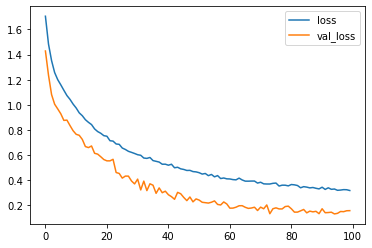

In [11]:
losses[['loss','val_loss']].plot()

# Predict

In [12]:
predictions = model.predict(X_test)


# Confusion Matrix

In [13]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(predictions,axis=1)

In [14]:
print(confusion_matrix(y_test_arg, Y_pred))

[[215   0   0   0  27   8]
 [  2 244   0   0   0   4]
 [  0   0 237   3   0  10]
 [  0   7   0 242   0   1]
 [  0   0   0   3 247   0]
 [  7   0   0   0   0 243]]


<AxesSubplot:>

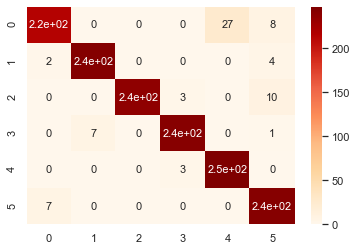

In [15]:
array = metrics.confusion_matrix(y_test_arg, Y_pred)
df_cm = pd.DataFrame(array, range(6), range(6))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 11}, cmap="OrRd") # font size

# classification Report

In [16]:
print(classification_report(y_test_arg, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       250
           1       0.97      0.98      0.97       250
           2       1.00      0.95      0.97       250
           3       0.98      0.97      0.97       250
           4       0.90      0.99      0.94       250
           5       0.91      0.97      0.94       250

    accuracy                           0.95      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.95      0.95      0.95      1500

